In [2]:
from PySections import *
import matplotlib.pyplot as plt

<h1>Punto 1</h1>

<h4>A. Formulacion Corrotacional</h4>

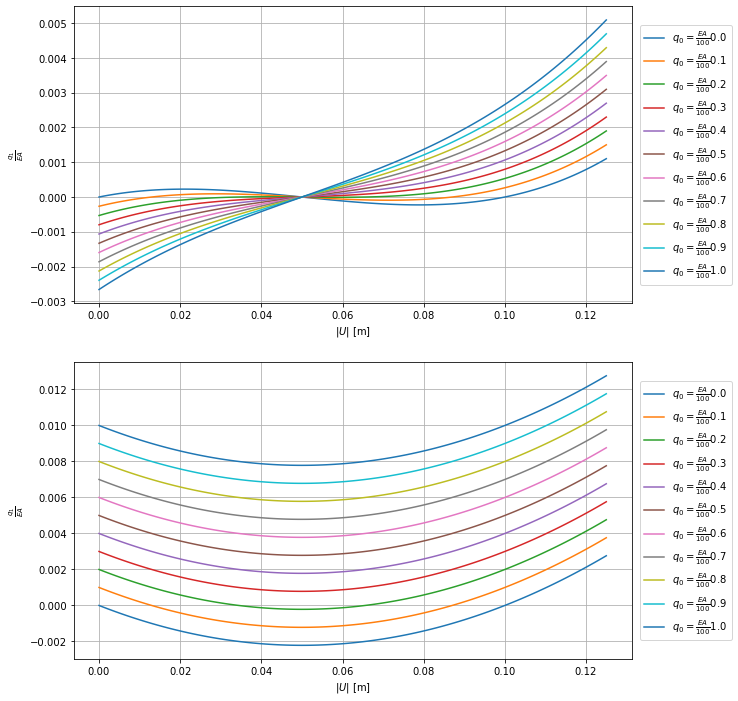

In [4]:
DX0 = 0.05
DY0 = 1.5/2
L0 = np.sqrt(DX0**2+DY0**2)
fea = lambda ux,q: 4*((DX0-ux)/L0)/L0*(np.sqrt(DY0**2+(DX0-ux)**2)-L0+q)
qea = lambda ux,q: (np.sqrt(DY0**2+(DX0-ux)**2)-L0+q)/L0
x = np.arange(0,0.126,0.001)
fig, ax = plt.subplots(2,1,figsize=(10, 12))
legenda = np.array([])
n = 10
h=L0/100/n
for j in range(0,n+1):
    i=j*h
    ax[0].plot(x,-fea(x,i))
    lbda = i/(L0/100)
    legenda = np.append(legenda,r'$q_0=\frac{EA}{100}'+format(np.round(lbda,2))+'$')
#ax.plot(x,-fea(x,L0/100))
ax[0].legend(legenda,borderaxespad=-10,loc='center right')
ax[0].grid(True)
ax[0].set_xlabel(r'$|U|$ [m]')
ax[0].set_ylabel(r'$\frac{q_1}{EA}$')
fig.savefig('Prueba.jpg')

for j in range(0,n+1):
    i=j*h
    ax[1].plot(x,qea(x,i))
    lbda = i/(L0/100)
    legenda = np.append(legenda,r'$q_0=\frac{EA}{100}'+format(np.round(lbda,2))+'$')
#ax.plot(x,-fea(x,L0/100))
ax[1].legend(legenda,borderaxespad=-10,loc='center right')
ax[1].grid(True)
ax[1].set_xlabel(r'$|U|$ [m]')
ax[1].set_ylabel(r'$\frac{q_1}{EA}$')
fig.savefig('Prueba.jpg')

<h4>C. Análisis con diferentes formulaciones</h4>

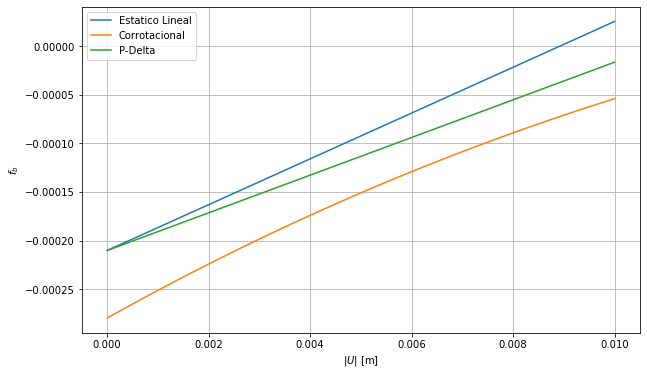

In [3]:
DX0 = 0.05
DY0 = 1.5/2
C0 = DX0/L0
L0 = np.sqrt(DX0**2+DY0**2)
feaEL = lambda ux,q: (4*C0**2)/L0*ux+(4*C0)*(q)
feaPD = lambda ux,q: ux*(4*C0**2/L0+(4*q)/(np.sqrt(DY0**2+(DX0-ux)**2))*(1-C0**2))+4*C0*q
feaCR = lambda ux,q: 4*((DX0-ux)/L0)/L0*(np.sqrt(DY0**2+(DX0-ux)**2)-L0+q)
x = np.arange(0,0.01+0.0001,0.0001)
fig, ax = plt.subplots(figsize=(10, 6))
legenda = np.array([])
ax.plot(x,feaEL(x,-7.9*10**-4)) 
ax.plot(x,-feaCR(x,7.9*10**-4)) #Esta ecuacion se hallo en funcion de la carga de preesfuerzo
ax.plot(x,feaPD(x,-7.9*10**-4)) 
ax.legend(['Estatico Lineal','Corrotacional','P-Delta'])
ax.grid(True)
ax.set_xlabel(r'$|U|$ [m]')
ax.set_ylabel(r'$f_b$')
fig.savefig('Prueba.jpg')

<h1>Punto 2</h1>

In [4]:
#Modelado inicial del problema y solucion por analisis estatico lineal.
from PySections import *
estructura = Estructura()
    
area = 3.54/1550
inercia = 53.8/(1550**2)

h = 4
l = 4
dl = 1

desplazamientosLibres=[55.3/1000,-15.1/1000,-0.00826,55.4/1000,-15.6/1000,-0.00829,0,0,0,0,0,0]

acero = Material('Acero', 200000000, 0.2, 9.9*10**-6, 23.54)
seccion = Seccion('Elementos', TipoSeccion.GENERAL, [area,inercia], acero)

estructura.agregarNodo(x=dl,y=h)
estructura.agregarNodo(x=l+dl,y=h)
estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=l,y=0,fix=[False,False,False])

estructura.agregarElemento(nodoInicial=2,nodoFinal=0,seccion=seccion,defCortante=False)
estructura.agregarElemento(nodoInicial=0,nodoFinal=1,seccion=seccion,defCortante=False)
estructura.agregarElemento(nodoInicial=3,nodoFinal=1,seccion=seccion,defCortante=False)

estructura.agregarCargaNodo(nodo=0,py=-120)
estructura.agregarCargaNodo(nodo=1,py=-120)

estructura.solucionar(True,True)

Se ha terminado de calcular, puedes examinar la variable de la estructura para consultar los resultados.


In [5]:
#Analisis no lineal con un solo intervalo de carga
estructura.solucionar(analisis='CR')[:,0] #Hace newton para una mejor solucion

array([ 0.05529981, -0.01505167, -0.00825451,  0.05536322, -0.01559654,
       -0.00829264])

In [6]:
#Hace el analisis no lineal para el elemento 1 con los desplazamientos propuestos en el enunciado
def guardarCSV(arreglo,nombre):
    import os
    path = os.getcwd()
    np.savetxt(path + "/"+nombre+".csv", arreglo, delimiter=",")

for i in estructura.elementos:
    i.Ue = np.array(desplazamientosLibres)[np.ix_(i.diccionario)]
i = estructura.elementos[0]
i.determinarV0()
i.calcularv()
i.fuerzasBasicas()
[Ke, P] = i.matrizYFuerzas()
K, PL = estructura.determinacionDeEstado()
try:
    guardarCSV(i.T,'T')
    guardarCSV(i.kb,'Kb')
    guardarCSV(i.T,'T')
    guardarCSV(Ke,'Ke')
    guardarCSV(P,'Pl')
except:
    print('error guardadno los archivos')
print('Residuo')
estructura.Fn[np.ix_(estructura.libres)]-PL

Residuo


array([[ 5.50949442],
       [ 5.03741279],
       [ 0.10400099],
       [-4.38009762],
       [-0.68384394],
       [ 0.00669309]])

In [7]:
#Realiza determinacion de estado con los nuevos desplazamientos
UlPrueba = [0.05529981, -0.01505167, -0.00825451,  0.05536322, -0.01559654 ,-0.00829264,0,0,0,0,0,0]
for i in estructura.elementos:
    i.Ue = np.array(UlPrueba)[np.ix_(i.diccionario)]
K, PL = estructura.determinacionDeEstado()
guardarCSV(K,'K')
guardarCSV(PL,'PL')
print('Residuo')
estructura.Fn[np.ix_(estructura.libres)]-PL

Residuo


array([[-3.46254967e-04],
       [-2.10039529e-04],
       [ 1.87349241e-05],
       [ 2.55083036e-04],
       [-1.42851103e-04],
       [-7.36906827e-07]])

c:\program files\python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


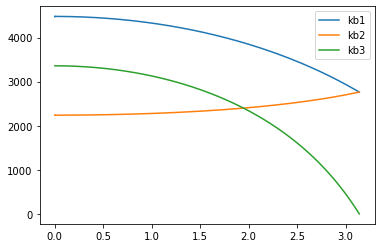

In [8]:
#Graficas de las funciones de aproximacion
import matplotlib.pyplot as plt
kb1 = lambda psi,E,I,L: ((E*I)/(L))*((psi*(np.sin(psi)-psi*np.cos(psi)))/(2-2*np.cos(psi)-psi*np.sin(psi)))
kb2 = lambda psi,E,I,L: ((E*I)/(L))*((psi*(psi-np.sin(psi)))/(2-2*np.cos(psi)-psi*np.sin(psi)))
kb3 = lambda psi,E,I,L: ((E*I)/(L))*((psi**2*np.sin(psi))/(np.sin(psi)-psi*np.cos(psi)))
x = np.arange(0.001,np.pi,0.00001)
plt.plot(x,kb1(x,estructura.elementos[1].E,estructura.elementos[1].Inercia,estructura.elementos[1].Longitud))
plt.plot(x,kb2(x,estructura.elementos[1].E,estructura.elementos[1].Inercia,estructura.elementos[1].Longitud))
plt.plot(x,kb3(x,estructura.elementos[1].E,estructura.elementos[1].Inercia,estructura.elementos[1].Longitud))
plt.legend(['kb1','kb2','kb3'])